# Setup

In [2]:
#ausführen!!!

import matplotlib.pyplot as plt

import pandas as pd
import itertools
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from itertools import combinations

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

import folium #for the map view of all airports

#loading the Dataset into a pandas dataframe
df = pd.read_csv('Airlines.csv')
allAirports = pd.read_csv('hopefullyAllAirports.csv')

# Stage 1 strstr(Analysis)
interesting charts


data head:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

data shape:
(539383, 9)

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Le

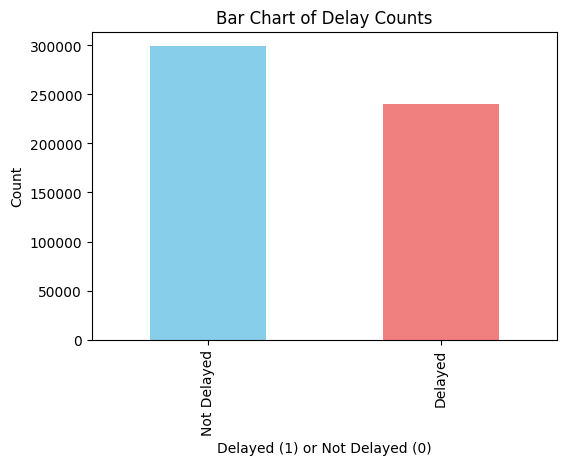

<Figure size 1200x600 with 0 Axes>

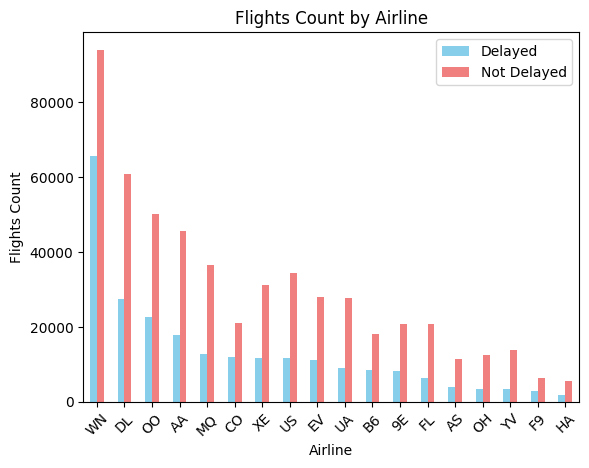

<Figure size 800x400 with 0 Axes>

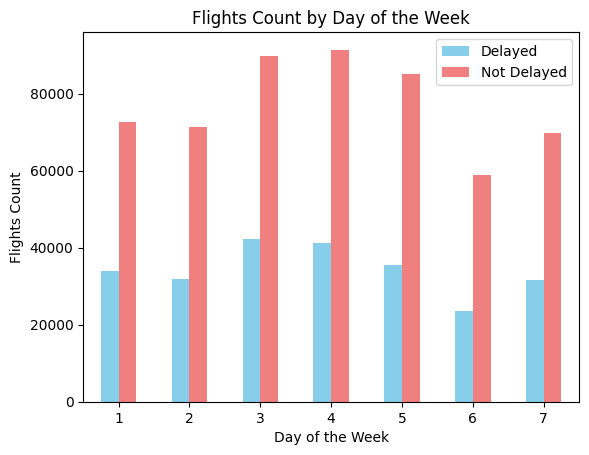

<Figure size 1200x600 with 0 Axes>

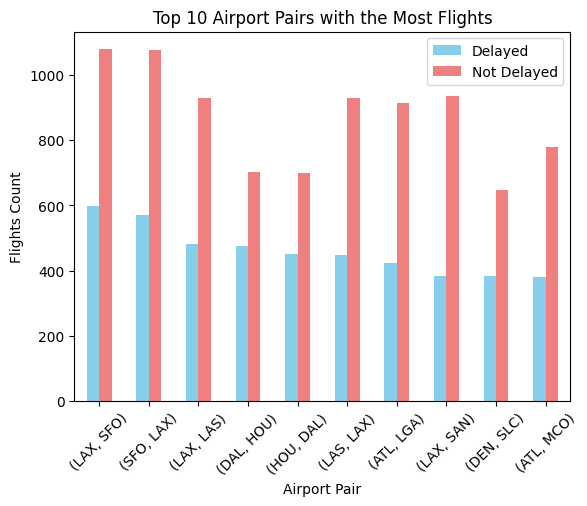

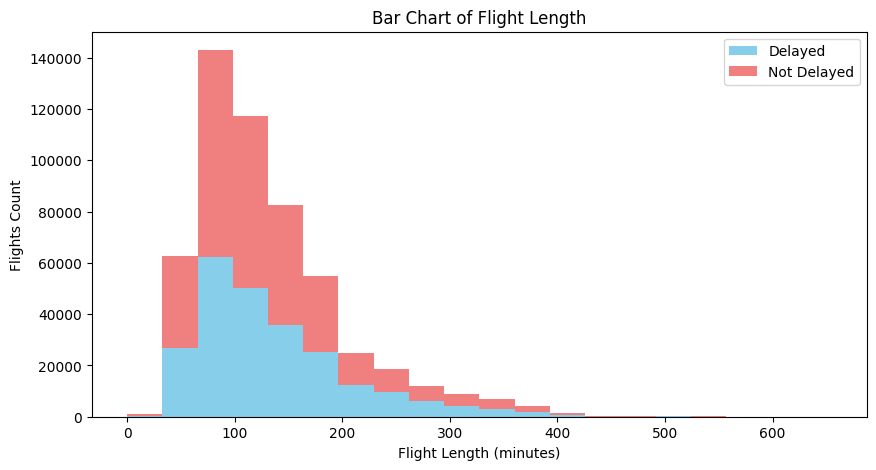

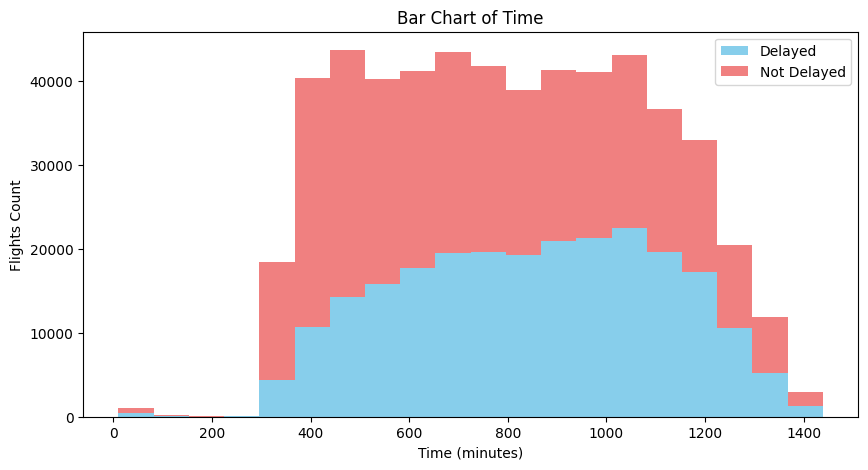

In [10]:
print("\ndata head:")
print(df.head()) #Check table composition

print("\ndata shape:")
print(df.shape) #How many entries are there? (Get height and width of Dataset)

print("\ndata info:")
print(df.info()) #Check for empty datatuple

print("\ndata discription:")
print(df.describe()) #Data visualization -> Mean etc.

#Outliers -> Only binary decision -> no problem
duplicate_values = df.duplicated()
if duplicate_values.any:
    print("\nNo duplicates")
else:    
    print("\nDuplicates found")
    print(duplicate_values)


duplicate_values = df['id'].duplicated()
if duplicate_values.any:
    print("\nNo duplicates id")
else:    
    print("\nDuplicates found id")
    print(duplicate_values)


# Farben für Delayed und Not Delayed festlegen
colors = ['lightcoral', 'skyblue']

# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()

plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()

#2. Chart of Country and Delay Count
delay_counts_by_airline = df.groupby('Airline')['Delay'].agg(['sum', 'count'])
delay_counts_by_airline = delay_counts_by_airline.sort_values(by='sum', ascending=False)

plt.figure(figsize=(12, 6))
delay_counts_by_airline.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Airline')
plt.ylabel('Flights Count')
plt.title('Flights Count by Airline')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=45)
plt.show()
# 3. Bar Chart of Day of the Week vs. Delay Counts
day_counts = df.groupby('DayOfWeek')['Delay'].agg(['sum', 'count'])
plt.figure(figsize=(8, 4))
day_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Day of the Week')
plt.ylabel('Flights Count')
plt.title('Flights Count by Day of the Week')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=0)
plt.show()

# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].agg(['sum', 'count']).nlargest(10, 'sum')
plt.figure(figsize=(12, 6))
airport_pairs_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Airport Pair')
plt.ylabel('Flights Count')
plt.title('Top 10 Airport Pairs with the Most Flights')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=45)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Length'], df[df['Delay'] == 0]['Length']], bins=20, color=['skyblue', 'lightcoral'], stacked=True)
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Flight Length')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Time'], df[df['Delay'] == 0]['Time']], bins=20, color=['skyblue', 'lightcoral'], stacked=True)
plt.xlabel('Time (minutes)')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Time')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()




In [3]:
dfFrom = df["AirportFrom"].unique()
dfTo = df["AirportTo"].unique()

# Concatenate those two arrays to one
dfAirports = np.concatenate((dfFrom, dfTo), axis=None)

# Remove duplicates
dfAirports = np.unique(dfAirports)
print("\nAirports count:")
print(dfAirports.shape)

# Convert dfAirports to a DataFrame
dfAirports = pd.DataFrame({'iata_code': dfAirports})

# Convert 'iata_code' columns to strings
dfAirports['iata_code'] = dfAirports['iata_code'].astype(str)
allAirports['iata_code'] = allAirports['iata_code'].astype(str)

# Merge dataframes based on the 'iata_code' column
merged_dataframe = pd.merge(dfAirports, allAirports, on='iata_code', how='left')

print("\nmerged_dataframe:")
print(merged_dataframe)


# Extract latitude and longitude from the 'coordinates' column
merged_dataframe[['longitude', 'latitude']] = merged_dataframe['coordinates'].str.split(', ', expand=True).astype(float)

# Create a folium map centered around the first entry
m = folium.Map(location=[merged_dataframe['latitude'].iloc[0], merged_dataframe['longitude'].iloc[0]], zoom_start=10)

# Add markers for each entry
for index, row in merged_dataframe.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m




Airports count:
(293,)

merged_dataframe:
    iata_code ident            type                                  name  \
0         ABE  KABE  medium_airport   Lehigh Valley International Airport   
1         ABI  KABI  medium_airport              Abilene Regional Airport   
2         ABQ  KABQ   large_airport     Albuquerque International Sunport   
3         ABR  KABR  medium_airport             Aberdeen Regional Airport   
4         ABY  KABY  medium_airport    Southwest Georgia Regional Airport   
..        ...   ...             ...                                   ...   
288       VPS  KVPS   large_airport        Destin-Ft Walton Beach Airport   
289       WRG  PAWG  medium_airport                      Wrangell Airport   
290       XNA  KXNA  medium_airport   Northwest Arkansas Regional Airport   
291       YAK  PAYA  medium_airport                       Yakutat Airport   
292       YUM  KNYL  medium_airport  Yuma MCAS/Yuma International Airport   

     elevation_ft continent iso_

# Stage 2 (df Preperation)

In [2]:
#ausführen!!!

# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'

X = df[features]
y = df[target]

# Randomly split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

# Combine the training and testing data to ensure consistent one-hot encoding
combined_data = pd.concat([X_train, X_test])


# Display the first few rows of each split dfFrame
print("Training Set:")
print(X_train.head())

print("\nTraining Set Delay:")
print(y_train.head())

print("Training Set:")
print(X_test.head())

print("\nTesting Set Delay:")
print(y_test.head())


# Define the categorical and numeric features
categorical_features = ['Airline', 'AirportFrom', 'AirportTo']
numeric_features = ['DayOfWeek', 'Time', 'Length']

#------------------------------------------------------------

pre_df = pd.get_dummies(df,categorical_features,drop_first=True)
pre_df.head()

X = pre_df.drop('Delay', axis=1)
y = pre_df['Delay']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
498081      F9         PDX       DEN          3   900     143
203828      WN         SAN       SJC          7  1185      80
156549      AA         LGA       DFW          5   365     250
66053       DL         BOS       MSP          6  1090     207
165376      FL         CMH       RSW          5   818     150

Training Set Delay:
498081    0
203828    1
156549    1
66053     0
165376    1
Name: Delay, dtype: int64
Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
442150      OO         SMF       LAX          7   881      85
229730      UA         DEN       LGA          2   665     223
69994       WN         OAK       LAS          7   465      85
414293      B6         JFK       CLT          5   990     131
171704      AS         SEA       FAI          5  1150     235

Testing Set Delay:
442150    1
229730    1
69994     1
414293    0
171704    1
Name: Delay, dtype: int64


Neuer Encoder

In [3]:
# new Encoder
#ausführen!!!

# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'

X = df[features]
y = df[target]
#Preprossing for K-Nearest-Neighbors Trainingset
knn_label_encoder = preprocessing.LabelEncoder()
y = knn_label_encoder.fit_transform(y)
print(y)

knn_encoder = preprocessing.OrdinalEncoder()
knn_encoded = pd.DataFrame(knn_encoder.fit_transform(X[['Airline', 'AirportFrom', 'AirportTo']]), columns = knn_encoder.get_feature_names_out(['Airline', 'AirportFrom', 'AirportTo']))

X = X.drop(columns = ['Airline', 'AirportFrom', 'AirportTo'])
X = X.join(knn_encoded)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

[1 1 1 ... 0 1 1]
        DayOfWeek  Time  Length  Airline  AirportFrom  AirportTo
0               3    15     205      4.0        253.0      135.0
1               3    15     222     14.0        217.0       60.0
2               3    20     165      1.0        154.0       80.0
3               3    20     195      1.0        253.0       80.0
4               3    30     202      2.0         14.0      252.0
...           ...   ...     ...      ...          ...        ...
539378          5  1439     326      4.0        203.0      264.0
539379          5  1439     305      8.0        252.0       16.0
539380          5  1439     255      8.0        253.0      184.0
539381          5  1439     313     13.0        128.0      253.0
539382          5  1439     301     14.0        154.0      216.0

[539383 rows x 6 columns]


## KNN

KNN ohne Kreuzvalidierung

In [4]:
#K-Nearest-Neighbors ohne Kreuzvalidierung
k_count = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

k_range = 20 #rule of thumb 1-20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
    knn_estimator.fit(X_train, y_train)
    predicted_knn = knn_estimator.predict(X_test) 
    accuracy = accuracy_score(y_test, predicted_knn)
    accuracies.append(accuracy)
    precision = precision_score(y_test, predicted_knn, average='weighted')
    recall = recall_score(y_test, predicted_knn, average='weighted')
    f1 = f1_score(y_test, predicted_knn, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(k)

plt.subplot(1, 2, 1)
plt.plot(k_count, accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')
plt.title('k vs. Metrics')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.tight_layout()
plt.savefig("knn.pdf")
plt.show()


KeyboardInterrupt: 

KNN mit Kreuzvalidierung

In [ ]:
#KNN mit Kreuzvalidierung
k_count = []
precisions = []
recalls = []
f1_scores = []
mean_accuracies = []

k_range = 20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter) ALT!
    knn_estimator.fit(X_train, y_train) 
    predicted_knn = knn_estimator.predict(X_test) 

    scores = cross_val_score(knn_estimator, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

    precision = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
    recall = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
    f1 = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))

plt.plot(k_count, mean_accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')

plt.title('Metrics vs. k (Cross-Validation)')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.savefig("knn_kreuz.pdf")
plt.show()


KNN ohne Kreuzvalidierung mit Loop

In [ ]:
data = []

k_range = 20
for k in range(1, k_range + 1):
    big_data = []

    # Get all combinations of columns
    column_combinations = []
    combination_count = 1
    for r in range(1, len(features) + 1):
        column_combinations.extend(combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Now you can use x_run for the current iteration
        knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
        knn_estimator.fit(x_run_train, y_train)
        predicted_knn = knn_estimator.predict(x_run_test)
        accuracy = accuracy_score(y_test, predicted_knn)
        precision = precision_score(y_test, predicted_knn, average='weighted')
        recall = recall_score(y_test, predicted_knn, average='weighted')
        f1 = f1_score(y_test, predicted_knn, average='weighted')
        average = (accuracy + f1) / 2
        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([k,str(combination), accuracy, precision, recall, f1, average])
        print("Combination Count: " + combination_count)
        combination_count += 1
    
    print("K: " + k)

In [ ]:
#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    k = entry[0]
    average = entry[-1]
    combination = entry[1]

    # Plotting
    plt.plot(k, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('K vs Average')
plt.xlabel('K')
plt.ylabel('Average')
plt.grid(True)
plt.savefig("knn_loop.pdf")
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['k','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)

KNN mit Kreuzvalidierung mit Loop

In [ ]:
data = []

k_range = 20
for k in range(1, k_range + 1):
    big_data = []

    # Get all combinations of columns
    column_combinations = []
    combination_count = 1
    for r in range(1, len(features) + 1):
        column_combinations.extend(combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Now you can use x_run for the current iteration
        knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter) 
        knn_estimator.fit(X_train, y_train) 
        predicted_knn = knn_estimator.predict(x_run_test)
        predicted_knn = knn_estimator.predict(X_test) 
        
        scores = cross_val_score(knn_estimator, x_run_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
        mean_accuracy = np.mean(scores)
        precision = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
        recall = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
        f1 = np.mean(cross_val_score(knn_estimator, x_run_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
        average = (mean_accuracy + f1) / 2
        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([k,str(combination), mean_accuracy, precision, recall, f1, average])
        print("Combination Count: " + combination_count)
        combination_count += 1
    
    print("K: " + k)

In [ ]:
#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    k = entry[0]
    average = entry[-1]
    combination = entry[1]

    # Plotting
    plt.plot(k, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('Max Tree Depth vs Average')
plt.xlabel('Max Tree Depth')
plt.ylabel('Average')
plt.grid(True)
plt.savefig("knn_kreuz_loop.pdf")
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['k','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)

## Decision Tree

In [5]:
max_tree_depth = 5  # You can adjust this value as needed

# Create a Decision Tree classifier within a pipeline
clf = Pipeline([
    ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
])



# Fit the classifier on the entire training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Cross-Validation Scores: [0.63648583 0.63397875 0.63824289 0.63545034 0.6385094 ]
Mean CV Accuracy: 0.6365334434460115
Test Set Accuracy: 0.6377633786627362
Precision: 0.6583590726736962
Recall: 0.3863494312263011
F1-Score: 0.4869428215059411


## Implementation for the DT that loops all col combinations and goes from 1 --> max tree depth

In [14]:
# For loop code DT
# Get all combinations of columns
data = []
for max_tree_depth in range(1, 5):

    big_data = []

    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(itertools.combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Create a Decision Tree classifier within a pipeline
        clf = Pipeline([
            ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth,random_state=42)) 
        ])

        # Train the classifier on the training set with selected columns
        clf.fit(x_run_train, y_train)

        # Make predictions on the testing set with selected columns
        y_pred = clf.predict(x_run_test)

        # Calculate and print the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        # Calculate and print precision, recall, and f1-score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # Perform cross-validation
        
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
        mean_accuracy = cv_scores.mean()

        average = (mean_accuracy + f1) / 2

        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([max_tree_depth,str(combination), accuracy, precision, recall, f1, average])

    # add the value with the highest average to data
    print(big_data)

    max_average = 0
    for i in range(0, len(big_data)):
        if big_data[i][-1] > max_average:
            max_average = big_data[i][-1]
            j = i
    data.append(big_data[j])



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

[[1, "('Airline',)", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('AirportFrom',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('AirportTo',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Time',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Length',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Airline', 'AirportFrom')", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('Airline', 'AirportTo')", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('Airline', 'DayOfWeek')", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('Airline', 'Time')", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[2, "('Airline',)", 0.6247578260426226, 0.700351774864087, 0.2737614067252802, 0.3936488915518274, 0.509203358797225], [2, "('AirportFrom',)", 0.5582932413767532, 0.5200230149597238, 0.09414975623984333, 0.15943409539937906, 0.3588636683880661], [2, "('AirportTo',)", 0.5578760996319883, 0.5612121212121212, 0.028938705779407475, 0.055039327957521846, 0.30645771379475506], [2, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [2, "('Time',)", 0.5698619724315656, 0.5154232701971395, 0.5556064836034835, 0.5347610740139165, 0.552311523222741], [2, "('Length',)", 0.5558460098074659, 0.5024855012427506, 0.17690320430017917, 0.2616802268244576, 0.40876311831596174], [2, "('Airline', 'AirportFrom')", 0.6247578260426226, 0.700351774864087, 0.2737614067252802, 0.3936488915518274, 0.509203358797225], [2, "('Airline', 'AirportTo')", 0.6247578260426226, 0.700351774864087, 0.2737614067252802, 0.3936488915518274, 0.509203358797225], [2, "('Airline', 'DayOfWeek')", 0.624757826

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[3, "('Airline',)", 0.6247578260426226, 0.700351774864087, 0.2737614067252802, 0.3936488915518274, 0.509203358797225], [3, "('AirportFrom',)", 0.5588587001863233, 0.5243133991201997, 0.09187882828451185, 0.15635802797425943, 0.3576083640802914], [3, "('AirportTo',)", 0.5595168571613968, 0.5130307308068194, 0.19686236926538606, 0.2845398699108649, 0.4220283635361308], [3, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [3, "('Time',)", 0.5744319919908785, 0.5215037160562452, 0.527751156298179, 0.5246088370214661, 0.5495204145061723], [3, "('Length',)", 0.5581912733946995, 0.5150138109239953, 0.1204216842368432, 0.1952010266628392, 0.3766961500287694], [3, "('Airline', 'AirportFrom')", 0.6247578260426226, 0.700351774864087, 0.2737614067252802, 0.3936488915518274, 0.509203358797225], [3, "('Airline', 'AirportTo')", 0.6247578260426226, 0.700351774864087, 0.2737614067252802, 0.3936488915518274, 0.509203358797225], [3, "('Airline', 'DayOfWeek')", 0.624757826042622

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[4, "('Airline',)", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('AirportFrom',)", 0.5616952640507245, 0.5251106272388846, 0.1557564898537439, 0.24025066281031576, 0.40097296343052014], [4, "('AirportTo',)", 0.562103135978939, 0.5169200588523786, 0.24155173132213842, 0.329248725630795, 0.445675930804867], [4, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [4, "('Time',)", 0.5744598014405294, 0.5215368143633669, 0.5277303220967541, 0.5246152890251228, 0.5495375452328262], [4, "('Length',)", 0.5593592702800412, 0.5170508948957796, 0.14625609400391684, 0.22801461632155912, 0.3936869433008001], [4, "('Airline', 'AirportFrom')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportTo')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'DayOfWeek')", 0.628762

### damit man sieht, dass man immer den ersten max wer nehmen muss, deshalb kein >=

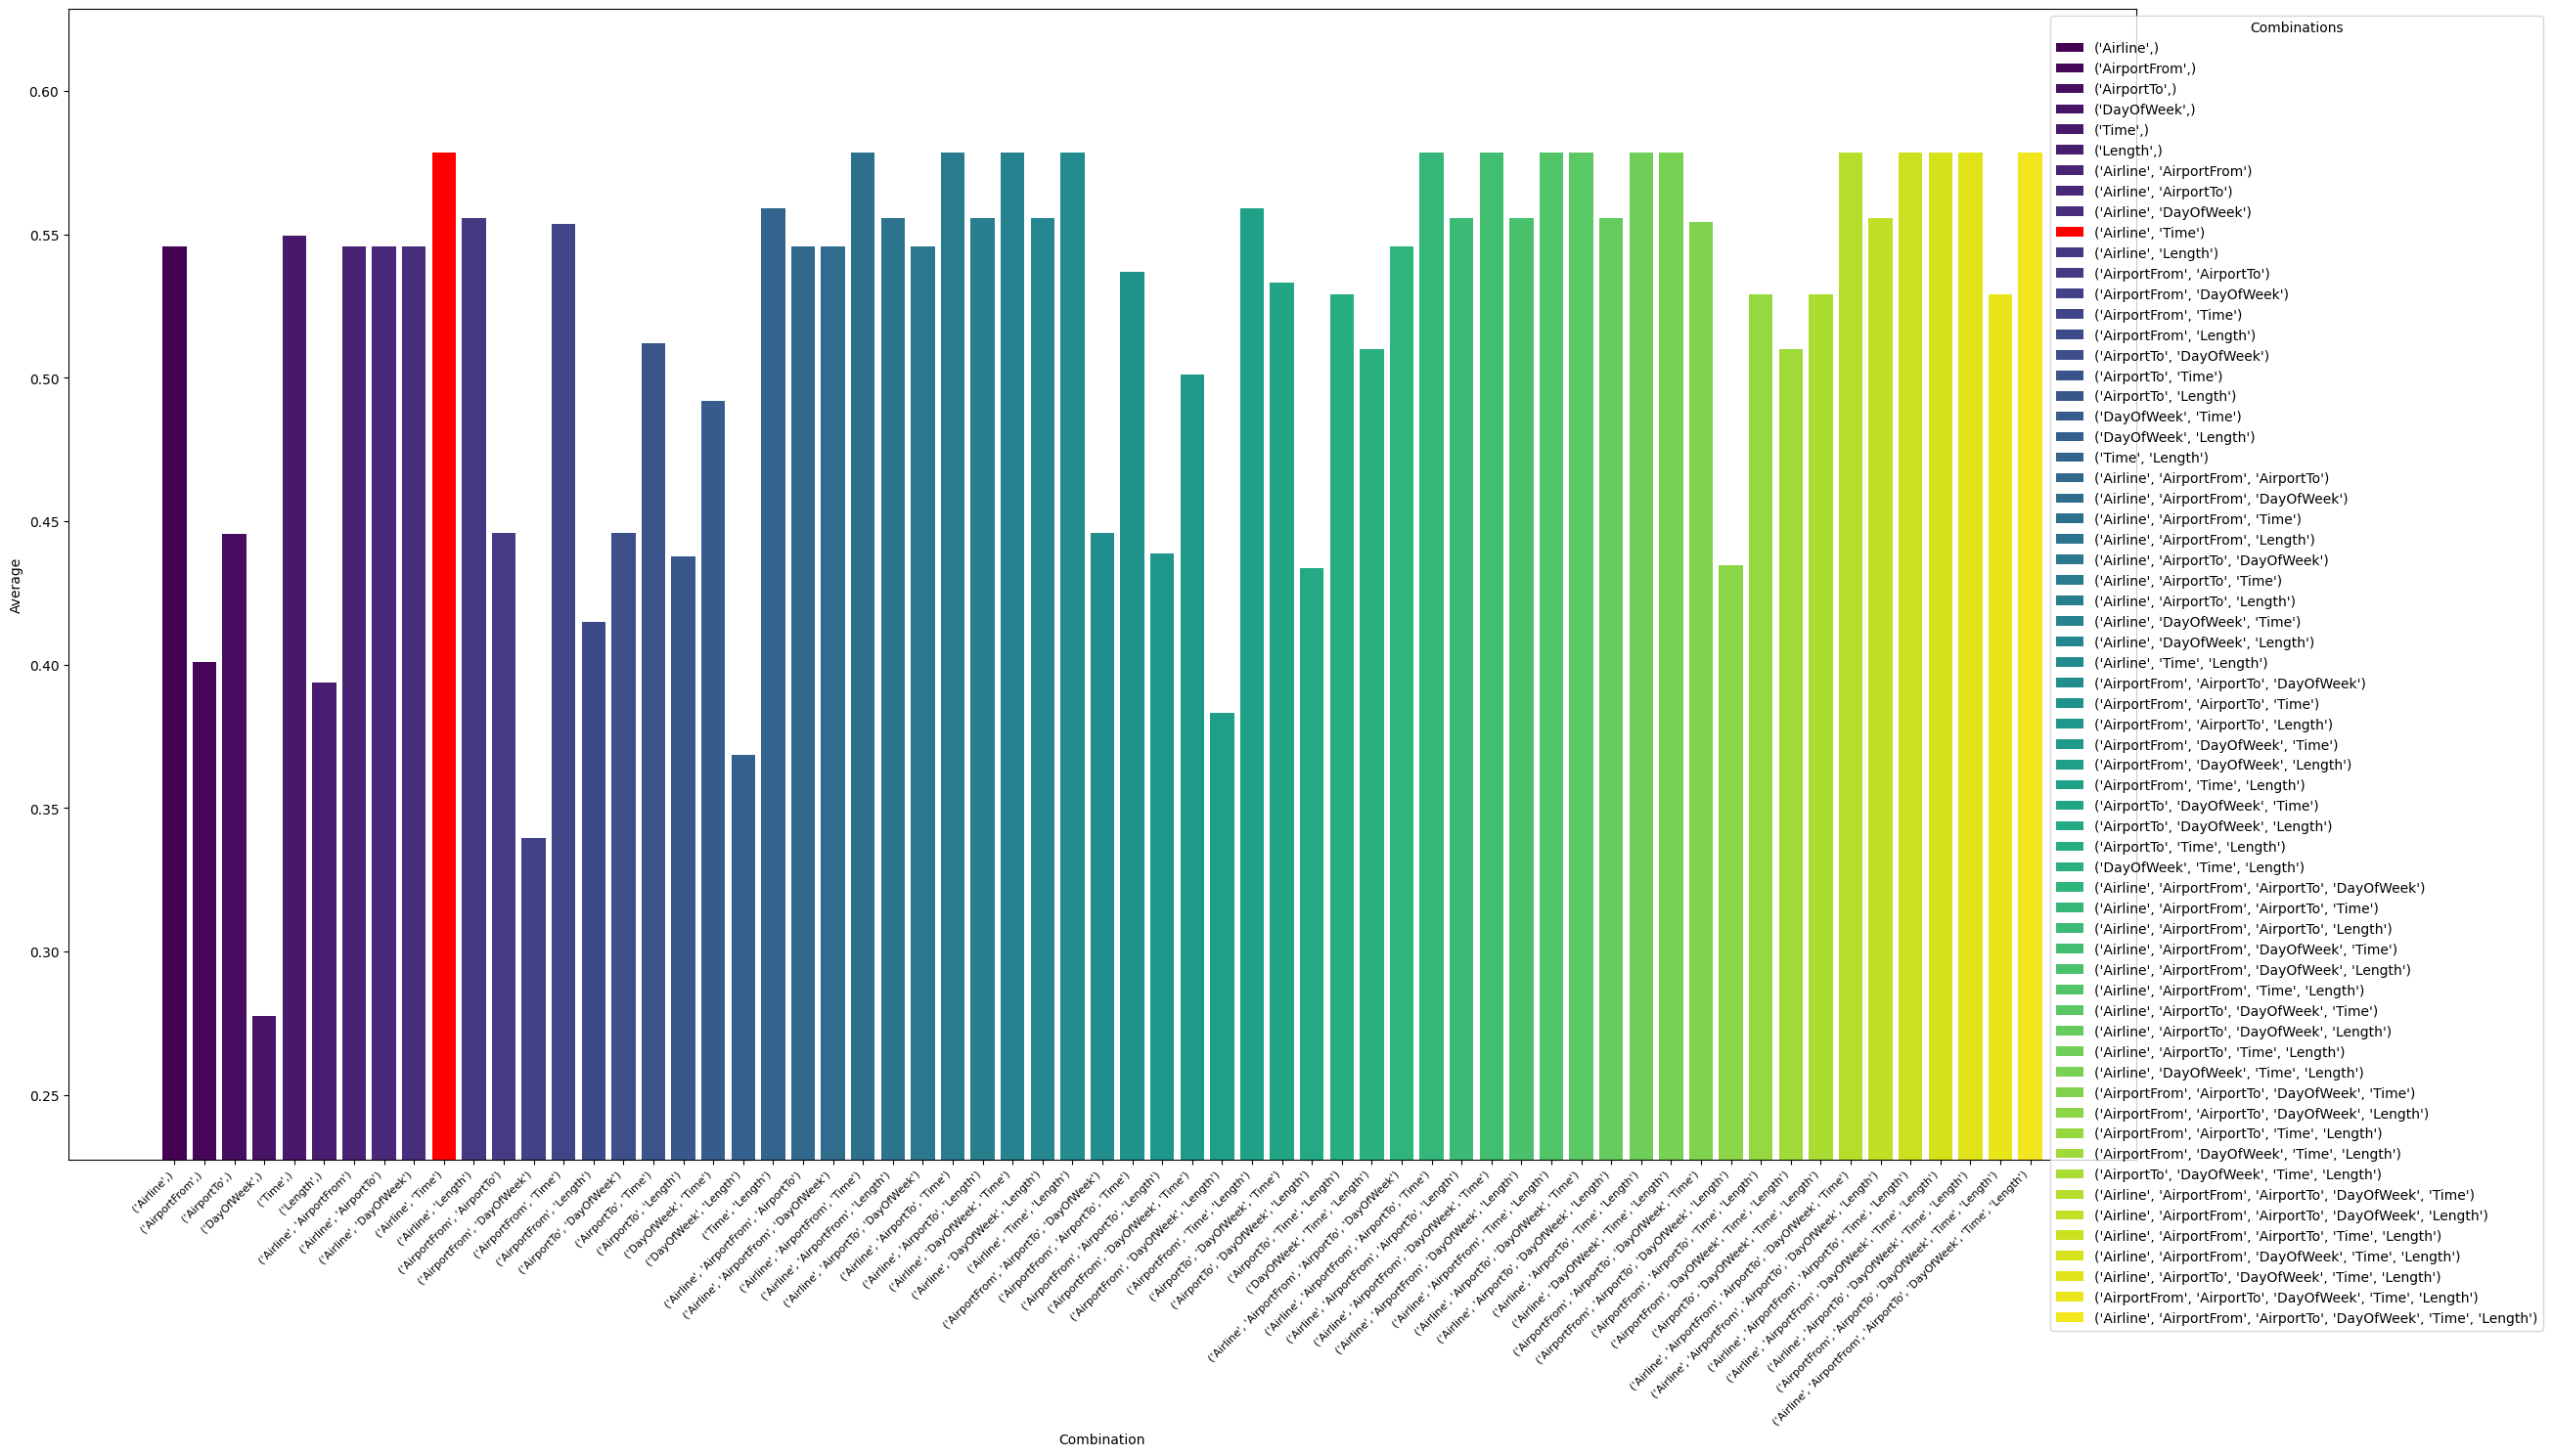

In [15]:
#big_data from depth 4
#big_data = [[4, "('Airline',)", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('AirportFrom',)", 0.5616952640507245, 0.5251106272388846, 0.1557564898537439, 0.24025066281031576, 0.40097296343052014], [4, "('AirportTo',)", 0.562103135978939, 0.5169200588523786, 0.24155173132213842, 0.329248725630795, 0.445675930804867], [4, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [4, "('Time',)", 0.5744598014405294, 0.5215368143633669, 0.5277303220967541, 0.5246152890251228, 0.5495375452328262], [4, "('Length',)", 0.5593592702800412, 0.5170508948957796, 0.14625609400391684, 0.22801461632155912, 0.3936869433008001], [4, "('Airline', 'AirportFrom')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportTo')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('AirportFrom', 'AirportTo')", 0.5620289774465363, 0.5167074527252503, 0.24194758114921455, 0.32957302796815807, 0.44580100270734724], [4, "('AirportFrom', 'DayOfWeek')", 0.5587845416539207, 0.5329066141473823, 0.0676486520271678, 0.12005694108077128, 0.33942074136734596], [4, "('AirportFrom', 'Time')", 0.5775466503517895, 0.524761574121347, 0.5353556398183258, 0.5300056721497447, 0.5537761612507671], [4, "('AirportFrom', 'Length')", 0.56409614653726, 0.5303124610979709, 0.1775073961415059, 0.265984015984016, 0.415040081260638], [4, "('AirportTo', 'DayOfWeek')", 0.5611946939570066, 0.5145678141667034, 0.24321846743614317, 0.33031053264483273, 0.44575261330091964], [4, "('AirportTo', 'Time')", 0.5793171853129027, 0.5387670420865441, 0.37872411350472934, 0.44478700237343705, 0.5120520938431699], [4, "('AirportTo', 'Length')", 0.5635121480945892, 0.5222662169428558, 0.2225926080253344, 0.31214666569279087, 0.43782940689369], [4, "('DayOfWeek', 'Time')", 0.5751828471314553, 0.5367447846112164, 0.3302012583857661, 0.4088692825632691, 0.4920260648473622], [4, "('DayOfWeek', 'Length')", 0.5582654319271022, 0.5172310458495655, 0.10787949497895746, 0.1785240221344964, 0.3683947270307993], [4, "('Time', 'Length')", 0.5800587706369291, 0.5269040395976369, 0.5500229176215675, 0.5382153269046502, 0.5591370487707896], [4, "('Airline', 'AirportFrom', 'AirportTo')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportFrom', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportFrom', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('Airline', 'AirportTo', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportTo', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('Airline', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek')", 0.5611390750577047, 0.5144254063339647, 0.24332263844326846, 0.33037722238723644, 0.44575814872247055], [4, "('AirportFrom', 'AirportTo', 'Time')", 0.5791781380646477, 0.5311265886407698, 0.46233176382349267, 0.4943472304213681, 0.5367626842430079], [4, "('AirportFrom', 'AirportTo', 'Length')", 0.5633452913966832, 0.5215690063281967, 0.2249468727863661, 0.3143277194718992, 0.4388365054342912], [4, "('AirportFrom', 'DayOfWeek', 'Time')", 0.5774817616359372, 0.5387053399923165, 0.3505771073794741, 0.4247419037281975, 0.5011118326820674], [4, "('AirportFrom', 'DayOfWeek', 'Length')", 0.5636233858931932, 0.5418063230365069, 0.12460935872328013, 0.20261869674949606, 0.3831210413213446], [4, "('AirportFrom', 'Time', 'Length')", 0.5800587706369291, 0.5269040395976369, 0.5500229176215675, 0.5382153269046502, 0.5591370487707896], [4, "('AirportTo', 'DayOfWeek', 'Time')", 0.578288235675816, 0.5306152379555621, 0.45226884453518895, 0.4883195177091183, 0.5333038766924671], [4, "('AirportTo', 'DayOfWeek', 'Length')", 0.5611205354246039, 0.5161178851754948, 0.21782157589899578, 0.30635118306351183, 0.4337358592440579], [4, "('AirportTo', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('DayOfWeek', 'Time', 'Length')", 0.5775929994345412, 0.5359808102345416, 0.37707821159214966, 0.4427023457182692, 0.5101476725764053], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek')", 0.6287623867923654, 0.6498190863862505, 0.3592024667694487, 0.46265933181269286, 0.5457108593025292], [4, "('Airline', 'AirportFrom', 'AirportTo', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'AirportTo', 'Length')", 0.6274646124753192, 0.630926037685241, 0.39205800241676736, 0.4836040296052631, 0.5555343210402911], [4, "('Airline', 'AirportFrom', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'AirportFrom', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'AirportTo', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek', 'Time')", 0.578149188427561, 0.5254330773002125, 0.5358764948539523, 0.5306034038164003, 0.5543762961219807], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek', 'Length')", 0.560953678726698, 0.5154870494122238, 0.2201758406600275, 0.30855924904013193, 0.43475646388341493], [4, "('AirportFrom', 'AirportTo', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('AirportFrom', 'DayOfWeek', 'Time', 'Length')", 0.5775929994345412, 0.5359808102345416, 0.37707821159214966, 0.4427023457182692, 0.5101476725764053], [4, "('AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Length')", 0.6274182633925675, 0.6308027484498073, 0.3920996708196175, 0.4835995014967945, 0.555508882444681], [4, "('Airline', 'AirportFrom', 'AirportTo', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportFrom', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('Airline', 'AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289], [4, "('AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.5823762247745117, 0.5388715891697894, 0.4254343930997125, 0.47548083639919897, 0.5289285305868553], [4, "('Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length')", 0.6309500634982433, 0.6135556542004217, 0.46074836451518814, 0.5262844768092144, 0.5786172701537289]]

# Extrahiere die benötigten Daten
combinations = [str(entry[1]) for entry in big_data]
averages = [entry[-1] for entry in big_data]

# Festlegen von verschiedenen Farben für jeden Balken
colors = plt.cm.viridis(np.linspace(0, 1, len(combinations)))

# Find the index of the maximum average value
max_avg_index = np.argmax(averages)

# Create a list of colors, setting 'red' for the maximum average value and 'viridis' for others
highlighted_colors = ['red' if i == max_avg_index else plt.cm.viridis(i / len(combinations)) for i in range(len(combinations))]

# Plot
fig, ax = plt.subplots(figsize=(26, 15))
bars = ax.bar(combinations, averages, color=highlighted_colors)

# Reduziere die Anzahl der x-Achsenbeschriftungen
x_ticks = range(0, len(combinations), 1)  # Adjust the step size according to your preference
plt.xticks(x_ticks, [combinations[i] for i in x_ticks], rotation=45, ha='right', fontsize=8)  # Rotate labels by 45 degrees

# Set y-axis limits for better visibility
plt.ylim(min(averages) - 0.05, max(averages) + 0.05)

# Achsentitel hinzufügen
plt.xlabel('Combination')
plt.ylabel('Average')

# Farblegende hinzufügen
plt.legend(bars, combinations, title='Combinations', loc='upper right', bbox_to_anchor=(1.2, 1))

# Vergrößere den Abstand zwischen den Balken
plt.tight_layout()

# Diagramm anzeigen
plt.show()

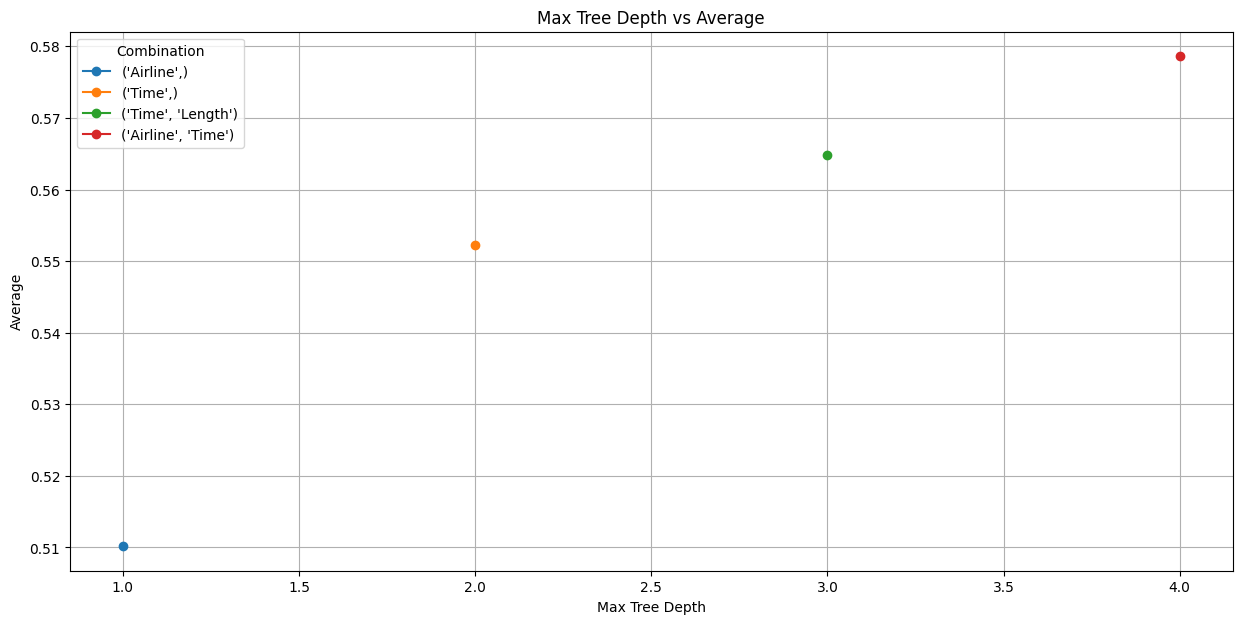


 Data:
  max_tree_depth          combination            accuracy           precision  \
0              1         ('Airline',)  0.5956876813407863  0.5787789443405724   
1              2            ('Time',)  0.5698619724315656  0.5154232701971395   
2              3   ('Time', 'Length')   0.576044940070636  0.5207679459647964   
3              4  ('Airline', 'Time')  0.6309500634982433  0.6135556542004217   

                recall                  f1             average  
0   0.3353681403391808  0.4246669304841049  0.5101773059124456  
1   0.5556064836034835  0.5347610740139165   0.552311523222741  
2   0.5911287970332098   0.553722153374772   0.564883546722704  
3  0.46074836451518814  0.5262844768092144  0.5786172701537289  


In [16]:
#loop throw data and convert the index 1 to a string
for i in range(0, len(data)):
    data[i][1] = str(data[i][1])
    
# Iterate over entries in data for plotting
plt.figure(figsize=(15, 7))
for entry in data:
    max_tree_depth = entry[0]
    average = entry[6]
    combination = entry[1]

    # Plotting
    plt.plot(max_tree_depth, average, marker='o', linestyle='-', label=str(combination))

# Display legend to identify each combination
plt.legend(title='Combination', loc='best')


plt.title('Max Tree Depth vs Average')
plt.xlabel('Max Tree Depth')
plt.ylabel('Average')
plt.grid(True)
plt.show()

print("\n Data:")
datadf = np.array(data)

datadf = pd.DataFrame(datadf, columns=[['max_tree_depth','combination', 'accuracy', 'precision', 'recall', 'f1', 'average']])
print(datadf)


Max Depth: 14, Accuracy: 0.6501942026567294, Precision: 0.6364119742649014, Recall: 0.4987291137130714, f1: 0.5592206699995328, Average: 0.6047074363281311
Max Depth: 15, Accuracy: 0.6495267758651057, Precision: 0.6327929524603837, Recall: 0.5058335763990166, f1: 0.5622351388277795, Average: 0.6058809573464425
Max Depth: 16, Accuracy: 0.6486461432928242, Precision: 0.6312641406392219, Recall: 0.5057294053918914, f1: 0.5615666678233914, Average: 0.6051064055581078
Max Depth: 17, Accuracy: 0.6461525626407854, Precision: 0.6216209525695613, Recall: 0.523167631984666, f1: 0.5681607348915084, Average: 0.6071566487661468
Max Depth: 18, Accuracy: 0.644910407223041, Precision: 0.6192127921279212, Recall: 0.5244176840701696, f1: 0.5678864723400415, Average: 0.6063984397815413
Max Depth: 19, Accuracy: 0.6395988023397017, Precision: 0.6114601412961107, Recall: 0.5211258802450102, f1: 0.5626905123446375, Average: 0.6011446573421696
Max Depth: 20, Accuracy: 0.636409985446388, Precision: 0.606067931

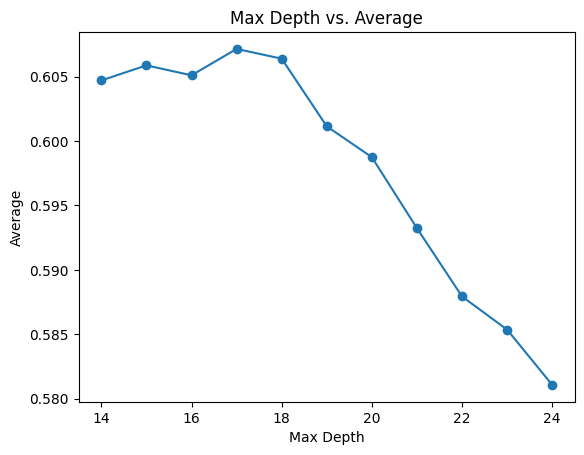

In [21]:
# just for testing 

# Create arrays to store max_depth and corresponding accuracies
depths = []
averages = []

# Loop through max depths from 1 to 10
for max_tree_depth in range(14, 25):

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
    ])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    average = (accuracy + f1) / 2

    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}, Average: {average}")

    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    averages.append(average)

# Plotting the graph
plt.plot(depths, averages, marker='o')
plt.title('Max Depth vs. Average')
plt.xlabel('Max Depth')
plt.ylabel('Average')
plt.show()

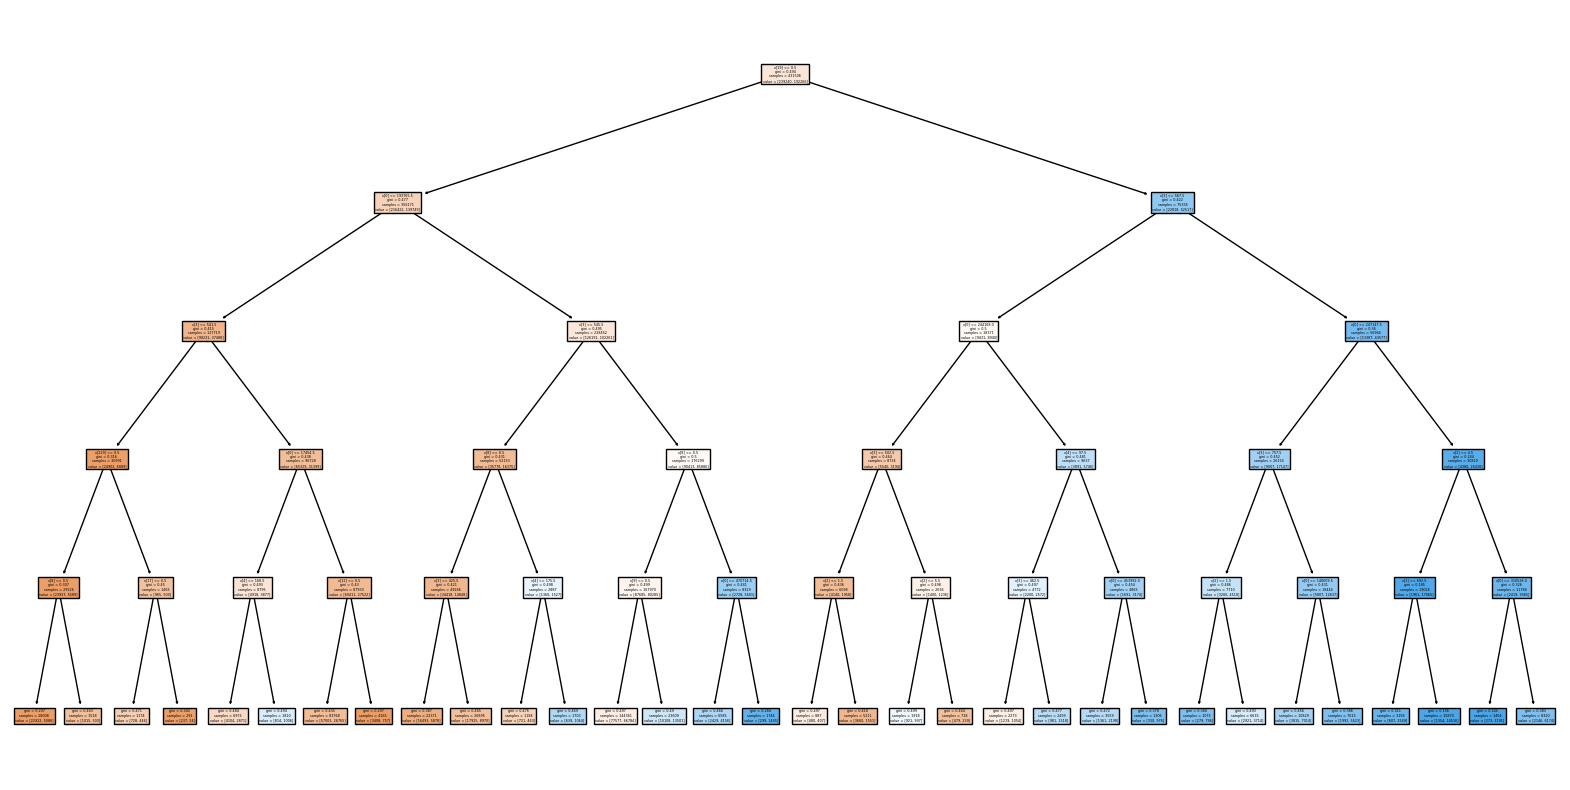

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf['classifier'], filled=True)
plt.savefig("test.pdf")
plt.show()


### Naive Bayes Classifier


NB ohne Cross_Val ohne Loop

In [9]:
#Create an NB Classifier
nb_estimator = GaussianNB()

# Train the classifier on the training set
nb_estimator.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = nb_estimator.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)


Accuracy: 0.5819034641304448
Precision: 0.5450780106505558
Recall: 0.36466102754281426
F1 Score: 0.5988772205297175


NB mit Cross_Val ohne Loop

In [23]:
# Create an NB Classifier
nb_estimator = GaussianNB()

# Combine the features and labels into a single dataset
data = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Create StratifiedKFold cross-validator
stratk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_accuracy = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='accuracy'))
print("Cross-Validation Accuracy:", cv_accuracy)

cv_precision = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='precision_weighted'))
print("Cross-Validation Precision:", cv_precision)

cv_recall = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='recall_weighted'))
print("Cross-Validation Recall:", cv_recall)

cv_f1 = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='f1_weighted'))
print("Cross-Validation F1:", cv_f1)




Cross-Validation Accuracy: 0.5826064214665554
Cross-Validation Precision: 0.5751279297254934
Cross-Validation Recall: 0.5826064214665554
Cross-Validation F1: 0.5653720190395705


NB mit Loop


In [24]:
data = []
big_data = []
column_combinations = []  # Get all combinations of columns
combination_count = 1
for r in range(1, len(features) + 1):
    column_combinations.extend(combinations(features, r))

# Iterate through each combination
for combination in column_combinations:
    # Create a new DataFrame for the current combination
    x_run_train = X_train[list(combination)].copy()
    x_run_test = X_test[list(combination)].copy()

    # Now you can use x_run for the current iteration
    nb_estimator = GaussianNB()
    nb_estimator.fit(x_run_train, y_train)
    predicted_nb = nb_estimator.predict(x_run_test)
    accuracy = accuracy_score(y_test, predicted_nb)
    precision = precision_score(y_test, predicted_nb, average='weighted')
    recall = recall_score(y_test, predicted_nb, average='weighted')
    f1 = f1_score(y_test, predicted_nb, average='weighted')
    average = (accuracy + f1) / 2

    # Add combination, accuracy, precision, recall, f1 as an array into the data array
    big_data.append([str(combination), accuracy, precision, recall, f1, average])
    print("Combination Count: " + str(combination_count))
    combination_count += 1

print(big_data)
max_average = 0
for i in range(0, len(big_data)):
    if big_data[i][-1] > max_average:
        max_average = big_data[i][-1]
        j = i
data.append(big_data[j])

print(data)

c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 1


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 2


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 3


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 4
Combination Count: 5
Combination Count: 6
Combination Count: 7
Combination Count: 8
Combination Count: 9
Combination Count: 10
Combination Count: 11
Combination Count: 12


c:\Users\leowa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Combination Count: 13
Combination Count: 14
Combination Count: 15
Combination Count: 16
Combination Count: 17
Combination Count: 18
Combination Count: 19
Combination Count: 20
Combination Count: 21
Combination Count: 22
Combination Count: 23
Combination Count: 24
Combination Count: 25
Combination Count: 26
Combination Count: 27
Combination Count: 28
Combination Count: 29
Combination Count: 30
Combination Count: 31
Combination Count: 32
Combination Count: 33
Combination Count: 34
Combination Count: 35
Combination Count: 36
Combination Count: 37
Combination Count: 38
Combination Count: 39
Combination Count: 40
Combination Count: 41
Combination Count: 42
Combination Count: 43
Combination Count: 44
Combination Count: 45
Combination Count: 46
Combination Count: 47
Combination Count: 48
Combination Count: 49
Combination Count: 50
Combination Count: 51
Combination Count: 52
Combination Count: 53
Combination Count: 54
Combination Count: 55
Combination Count: 56
Combination Count: 57
Combinatio

NB mit Cross_Val mit Loop

In [25]:
data = []
big_data = []
column_combinations = []  # Get all combinations of columns
combination_count = 1

for r in range(1, len(features) + 1):
    column_combinations.extend(combinations(features, r))

# Iterate through each combination
for combination in column_combinations:
    # Create a new DataFrame for the current combination
    x_run_train = X_train[list(combination)].copy()
    x_run_test = X_test[list(combination)].copy()

    # Now you can use x_run for the current iteration
    nb_estimator = GaussianNB()

    data = np.concatenate((X_train, X_test), axis=0)
    labels = np.concatenate((y_train, y_test), axis=0)

    # Create StratifiedKFold cross-validator
    stratk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_accuracy = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='accuracy'))
    cv_precision = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='precision_weighted'))
    cv_recall = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='recall_weighted'))
    cv_f1 = np.mean(cross_val_score(nb_estimator, data, labels, cv=stratk_fold, scoring='f1_weighted'))
    average = (cv_accuracy + cv_f1) / 2

    # Add combination, accuracy, precision, recall, f1 as an array into the data array
    big_data.append([str(combination), accuracy, precision, recall, f1, average])
    print("Combination Count: " + str(combination_count))
    combination_count += 1

print(big_data)
max_average = 0
for i in range(0, len(big_data)):
    if big_data[i][-1] > max_average:
        max_average = big_data[i][-1]
        j = i
data.append(big_data[j])

print(data)


Combination Count: 1
Combination Count: 2
Combination Count: 3
Combination Count: 4


KeyboardInterrupt: 

**Random Forests**

In [7]:
max_tree_depth = 5 # max_depth=10 drinne lassen ???? ist nur drin, damit man es einfacher anpassen kann

# Create a Decision Tree classifier within a pipeline
RandomForestCLF = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None)) 
])

# Train the classifier on the training set
RandomForestCLF.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = RandomForestCLF.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

####Cross Validation Added

scores = cross_val_score(RandomForestCLF, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
mean_accuracy = np.mean(scores)
print("Mean Accuracy", precision)

precisionCross = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
print("PrecisionCross:", precisionCross)
recallCross = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
print("RecallCross:", recallCross)
f1Cross = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
print("F1-ScoreCross:", f1Cross)

Accuracy: 0.6198262836378468
Precision: 0.5750859845227859
Recall: 0.5573773907246136
F1-Score: 0.5660932309189785
Mean Accuracy 0.5750859845227859


NameError: name 'knn_estimator' is not defined

In [ ]:

# testing different depths

# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []

# Loop through max depths
for max_tree_depth in range(1, 40):

    # Create a Random Forest classifier within a pipeline
    clf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= max_tree_depth)) 
])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}")
    
    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Testing all possible Variations of Collumns

In [11]:
# For loop code DT
# Get all combinations of columns
max_tree_depth =5
data = []
for max_tree_depth in range(1, 5):

    big_data = []

    column_combinations = []
    for r in range(1, len(features) + 1):
        column_combinations.extend(itertools.combinations(features, r))

    # Iterate through each combination
    for combination in column_combinations:
        # Create a new DataFrame for the current combination
        x_run_train = X_train[list(combination)].copy()
        x_run_test = X_test[list(combination)].copy()

        # Create a Decision Tree classifier within a pipeline
        RandomForestCLF = Pipeline([
            ('classifier', RandomForestClassifier(max_depth=max_tree_depth,random_state=42)) 
        ])

        # Train the classifier on the training set with selected columns
        RandomForestCLF.fit(x_run_train, y_train)

        # Make predictions on the testing set with selected columns
        y_pred = RandomForestCLF.predict(x_run_test)

        # Calculate and print the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        # Calculate and print precision, recall, and f1-score
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        average = (accuracy + f1) / 2

        
        #add combination, accuracy, precision, recall, f1 as an array inot the data array
        big_data.append([max_tree_depth,str(combination), accuracy, precision, recall, f1, average])

    # add the value with the highest average to data
    print(big_data)

    max_average = 0
    for i in range(0, len(big_data)):
        if big_data[i][-1] > max_average:
            max_average = big_data[i][-1]
            j = i
    data.append(big_data[j])



c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppDa

[[1, "('Airline',)", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('AirportFrom',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('AirportTo',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('DayOfWeek',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Time',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Length',)", 0.5550673452172381, 0.0, 0.0, 0.0, 0.27753367260861905], [1, "('Airline', 'AirportFrom')", 0.5954188566608267, 0.5811007191563886, 0.324909371223801, 0.4167835905659117, 0.5061012236133692], [1, "('Airline', 'AirportTo')", 0.5895974118672191, 0.6200296449055874, 0.20044585191049627, 0.302952058568842, 0.44627473521803057], [1, "('Airline', 'DayOfWeek')", 0.5956876813407863, 0.5787789443405724, 0.3353681403391808, 0.4246669304841049, 0.5101773059124456], [1, "('Airline', 'Time')", 0.6082946318492357, 0.6329535982217283, 0.28476186507771156, 

c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\I568804\AppDa

**Neural Network Test**

In [9]:
neuralnet =MLPClassifier(hidden_layer_sizes = (10, ), learning_rate_init=.1) #Tested with different Layer Numbers
neuralnet.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = neuralnet.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

####Cross Validation Added

scores = cross_val_score(neuralnet, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
mean_accuracy = np.mean(scores)
print("Mean Accuracy", precision)

precisionCross = np.mean(cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
print("PrecisionCross:", precisionCross)
recallCross = np.mean(cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
print("RecallCross:", recallCross)
f1Cross = np.mean(cross_val_score(neuralnet, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))
print("F1-ScoreCross:", f1Cross)



Accuracy: 0.5550673452172381
Accuracy: 0.5550673452172381
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


c:\Users\I568804\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Accuracy 0.0
PrecisionCross: 0.30739295492643715
RecallCross: 0.5544302976207502
F1-ScoreCross: 0.39550561436311416
